BANK CUSTOMER CHURN ANALYSIS

In [ ]:
# ===============================
# Bank Customer Churn Analysis
# Portfolio Project (Fintech)
# ===============================

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

sns.set(style="whitegrid")


Load Dataset

In [ ]:
# Load CSV
df = pd.read_csv("../data/bank_churn.csv")

# Quick look
df.head()


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Data Cleaaning

In [ ]:
# Drop unused columns
df.drop(columns=["customer_id"], inplace=True)

# Check for missing values
print(df.isnull().sum())


credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


Encode Categorical Variables

In [4]:
# Encode 'gender' and 'country'
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])  # Female=0, Male=1

le_country = LabelEncoder()
df['country'] = le_country.fit_transform(df['country'])  # e.g., France=0, Germany=1, Spain=2


EDA

Churn Distribution

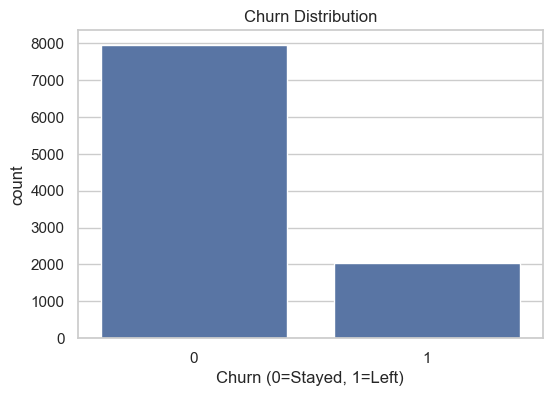

churn
0    79.63
1    20.37
Name: proportion, dtype: float64


In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0=Stayed, 1=Left)')
plt.show()

print(df['churn'].value_counts(normalize=True)*100)


From the dataset, the percentage of customer stayed with the bank is higher which is 79.63% compared to the one who left which is 20.37%. 

This shows that the bank retains the majority of its customers, but a 20% churn rate is still significant.


This imbalance in churn vs. non-churn also means the dataset is imbalanced, which will need special handling later during modeling

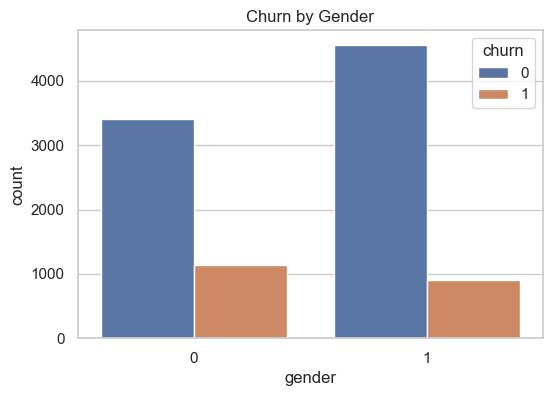

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='churn', data=df)
plt.title('Churn by Gender')
plt.show()


0 - Female/
1- Male/
Blue - Stayed/
Orange - Left

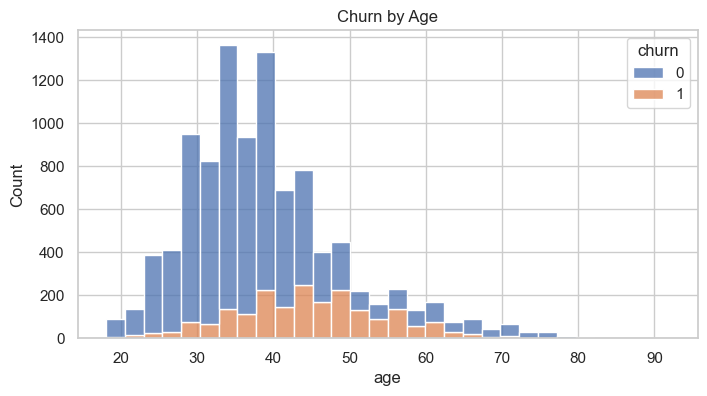

In [7]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='age', hue='churn', bins=30, multiple='stack')
plt.title('Churn by Age')
plt.show()


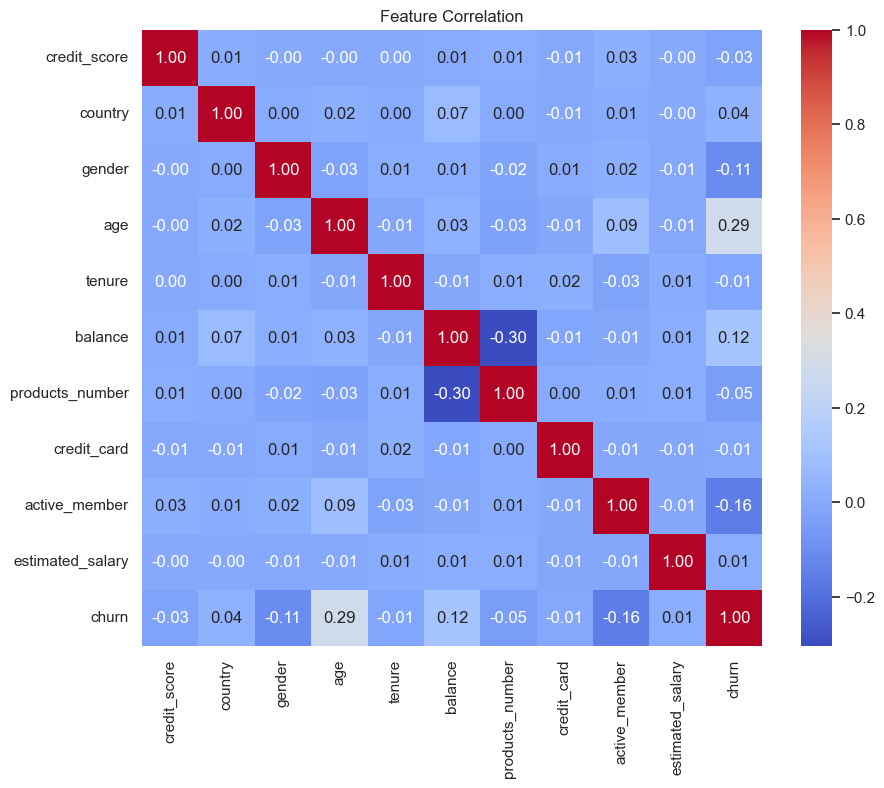

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


Feature Selection & Train/Test Split

In [9]:
X = df.drop('churn', axis=1)
y = df['churn']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric features
numeric_cols = ['credit_score','age','tenure','balance','products_number','estimated_salary']
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


Modelling

In [11]:
# Check imbalancy
from collections import Counter

print("Class distribution before balancing:", Counter(y))


Class distribution before balancing: Counter({0: 7963, 1: 2037})


a) Logistic Regression

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.815
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



b) Random Forest

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.864
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



c) XGBoost

In [13]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8555
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.68      0.49      0.57       393

    accuracy                           0.86      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.86      0.85      2000



/opt/homebrew/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [01:37:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


IMBALANCE DATASET RESULT

In [14]:
print("Logistic Regression (Imbalanced)")
print(classification_report(y_test, y_pred_lr))

print("Random Forest (Imbalanced)")
print(classification_report(y_test, y_pred_rf))

print("XGBoost (Imbalanced)")
print(classification_report(y_test, y_pred_xgb))


Logistic Regression (Imbalanced)
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Random Forest (Imbalanced)
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

XGBoost (Imbalanced)
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1607
           1       0.68      0.49      0.57       393

    accuracy                           0.86      2000
   macro avg       0.78      0.72      0.74    

Apply SMOTE (to balance)

In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print("Class distribution after SMOTE:", Counter(y_sm))


Class distribution after SMOTE: Counter({1: 7963, 0: 7963})


In [17]:
#Split balanced dataset
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(
    X_sm, y_sm, test_size=0.2, random_state=42
)

# Scale numerical columns (same as before)
X_train_sm[numeric_cols] = scaler.fit_transform(X_train_sm[numeric_cols])
X_test_sm[numeric_cols] = scaler.transform(X_test_sm[numeric_cols])


Modelling (Balance)

a) Logistic Regression

In [18]:
lr_sm = LogisticRegression()
lr_sm.fit(X_train_sm, y_train_sm)
y_pred_lr_sm = lr_sm.predict(X_test_sm)

print("Logistic Regression (Balanced using SMOTE)")
print(classification_report(y_test_sm, y_pred_lr_sm))


Logistic Regression (Balanced using SMOTE)
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1633
           1       0.75      0.77      0.76      1553

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.76      0.76      0.76      3186



b) Random Forest

In [19]:
rf_sm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_sm.fit(X_train_sm, y_train_sm)
y_pred_rf_sm = rf_sm.predict(X_test_sm)

print("Random Forest (Balanced using SMOTE)")
print(classification_report(y_test_sm, y_pred_rf_sm))


Random Forest (Balanced using SMOTE)
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1633
           1       0.85      0.87      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



c) XGBoost

In [20]:
xgb_sm = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_sm.fit(X_train_sm, y_train_sm)
y_pred_xgb_sm = xgb_sm.predict(X_test_sm)

print("XGBoost (Balanced using SMOTE)")
print(classification_report(y_test_sm, y_pred_xgb_sm))


XGBoost (Balanced using SMOTE)
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1633
           1       0.85      0.88      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



/opt/homebrew/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [01:45:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


OVERALL BEST MODEL: XGBoost (Balanced using SMOTE)

Accuracy: 0.86

Overall, the model gives the correct prediction 86% of the time.
This means the system is reliable and can be used to support customer retention decisions.

Precision (class 1 / churn): 0.85

When the model says a customer will leave, it is correct 85% of the time.
This reduces wasted effort your retention team will not spend too much time on false alarms.

Useful for → avoiding unnecessary calls or offers

Recall (class 1 / churn): 0.88

The model successfully identifies 88% of customers who are actually at risk of leaving.
This is the most important metric because missing a churn customer means losing revenue.

Useful for → saving customers before they leave

F1-score (class 1 / churn): 0.86

This measures how well the model balances between catching most churners and being accurate when it flags them.
An F1-score of 86% indicates strong and stable performance.

FINAL MODEL FOR VISUALISATION

In [23]:
print("===== IMBALANCED RANDOM FOREST =====")
print(classification_report(y_test, y_pred_rf))

print("===== BALANCED (SMOTE) RANDOM FOREST =====")
print(classification_report(y_test_sm, y_pred_rf_sm))


===== IMBALANCED RANDOM FOREST =====
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.74      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

===== BALANCED (SMOTE) RANDOM FOREST =====
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1633
           1       0.85      0.87      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



Even though XGBoost was the best model for prediction, we often use Random Forest (RF) to calculate feature importance

Simple “% contribution” of each feature


A clear ranking of which variables matter most

No complicated boosting interactions

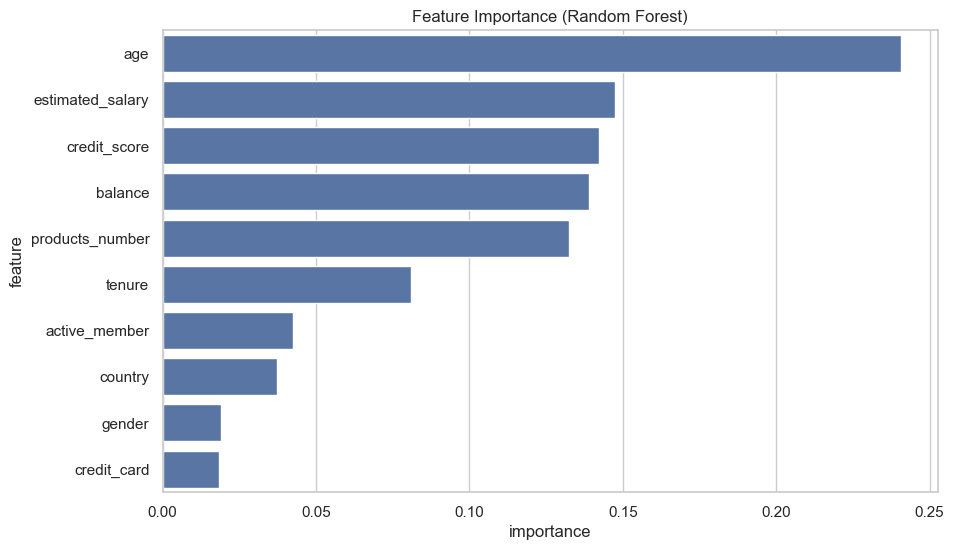

In [22]:
# Random Forest feature importance
importances = rf.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'feature':features, 'importance':importances})
feature_df = feature_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=feature_df)
plt.title('Feature Importance (Random Forest)')
plt.show()


In [30]:
# Select raw columns
raw_columns = ['age', 'tenure', 'balance', 'products_number', 'estimated_salary',
               'credit_score', 'country', 'gender', 'credit_card', 'active_member']

# Select the same rows as X_test from the original dataframe
df_raw_test = df.loc[X_test.index, raw_columns].copy()

# Add actual and predicted churn
df_raw_test['churn_actual'] = y_test.values
df_raw_test['churn_predicted'] = y_pred_rf

# Save to CSV for Tableau
df_raw_test.to_csv("../tableau/bank_churn_for_tableau.csv", index=False)
